In [9]:
import os
import pandas as pd

train_dir = "/content/drive/MyDrive/xray_dataset_covid19/train"
test_dir = "/content/drive/MyDrive/xray_dataset_covid19/test"
classes_train=os.listdir(train_dir)
classes_test=os.listdir(test_dir)

In [10]:
print(classes_train)

['.DS_Store', 'PNEUMONIA', 'NORMAL']


In [11]:
print(classes_test)

['.DS_Store', 'PNEUMONIA', 'NORMAL']


In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Dataset structure and class distribution
classes_train = os.listdir(train_dir)
classes_test = os.listdir(test_dir)

classes_train = [cls for cls in classes_train if cls != '.DS_Store']
classes_test = [cls for cls in classes_test if cls != '.DS_Store']

train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes_train}
test_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in classes_test}


print("Dataset Distribution:")
for cls in classes_train:
    print(f"Train set - {cls}: {train_counts[cls]}")
for cls in classes_test:
    print(f"Test set - {cls}: {test_counts[cls]}\n")


Dataset Distribution:
Train set - PNEUMONIA: 74
Train set - NORMAL: 74
Test set - PNEUMONIA: 20

Test set - NORMAL: 20



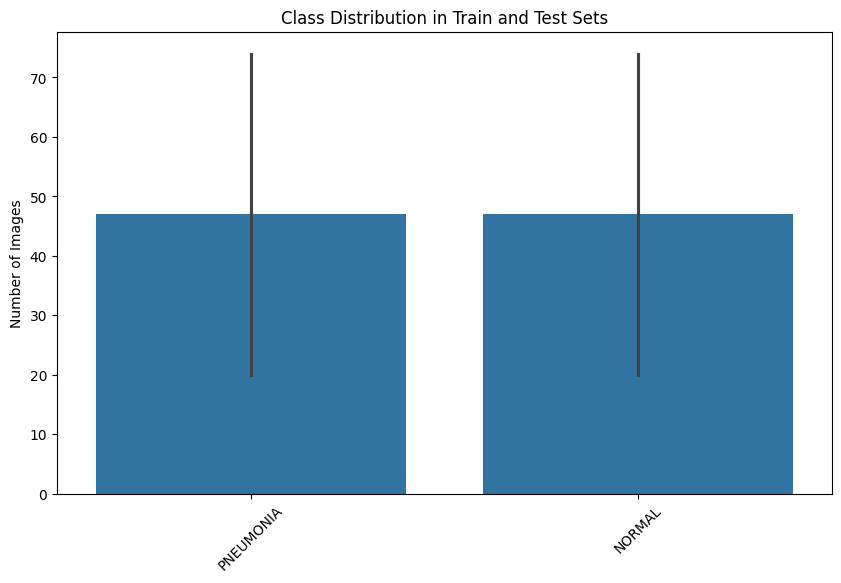

In [37]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_counts.keys()) + list(test_counts.keys()),
            y=list(train_counts.values()) + list(test_counts.values()))
plt.title('Class Distribution in Train and Test Sets')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Examine image properties
def get_image_properties(image_path):
    img = Image.open(image_path)
    return img.size, img.format

sample_images = {}
for cls in classes_train:
    sample_images[cls] = os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[0])

print("Image Properties:")
for cls, img_path in sample_images.items():
    size, format = get_image_properties(img_path)
    print(f"{cls} image - Size: {size}, Format: {format}")
print()


Image Properties:
PNEUMONIA image - Size: (4200, 3408), Format: JPEG
NORMAL image - Size: (2031, 1837), Format: JPEG



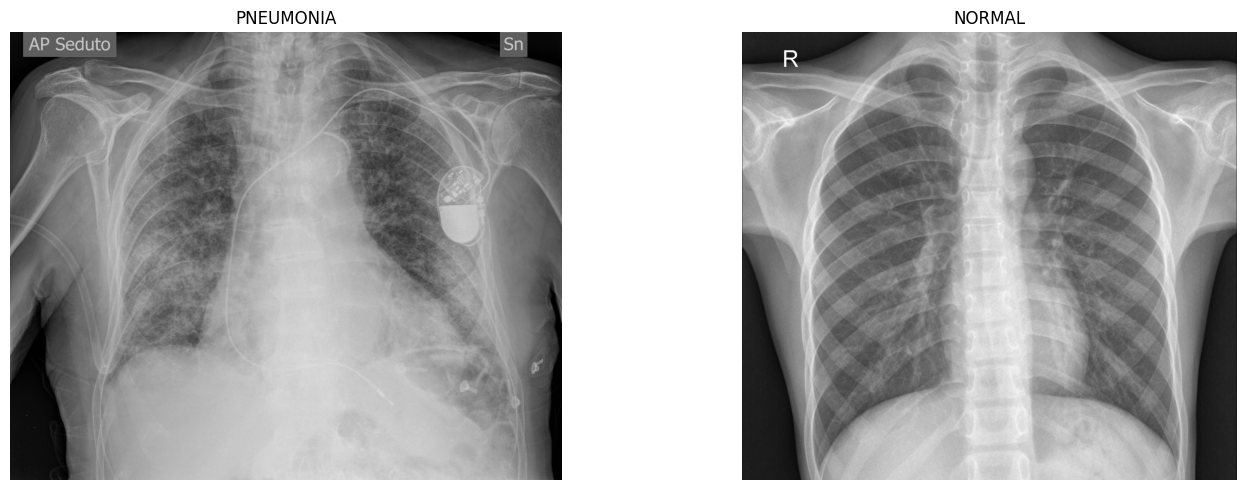

In [39]:
# Visualize sample images
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
for i, (cls, img_path) in enumerate(sample_images.items()):
    axes[i].imshow(plt.imread(img_path), cmap='gray')
    axes[i].set_title(cls)
    axes[i].axis('off')
plt.tight_layout()
plt.show()


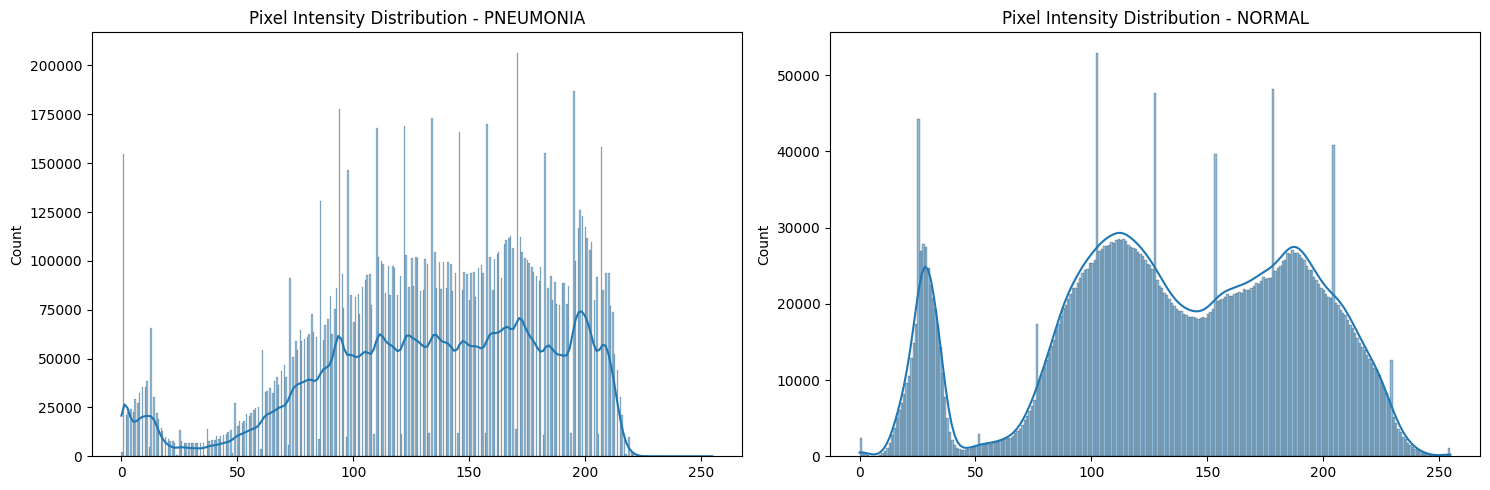

In [40]:
# Analyze pixel intensity distribution
plt.figure(figsize=(15, 5))
for i, (cls, img_path) in enumerate(sample_images.items()):
    img_array = np.array(Image.open(img_path).convert('L'))
    plt.subplot(1, len(sample_images), i+1)
    sns.histplot(img_array.ravel(), kde=True)
    plt.title(f'Pixel Intensity Distribution - {cls}')
plt.tight_layout()
plt.show()


In [12]:
# First for Training data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator( # The ImageDataGenerator class allows your model to receive new variations of the images at each epoch.
    zoom_range=0.2, # The amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # convert the pixels in range [0,255] to range [0,1]
    width_shift_range=0.10, # The percentage of Width shifitning (Vertical)
    height_shift_range=0.10, # The percentage of height shifitning (Horizontal)
    shear_range=0.1 # Shear angle in counter-clockwise direction in degrees
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary', # 1D binary lables.
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2] # The dimensions to which all images found will be resized.
)

Found 148 images belonging to 2 classes.


In [13]:
# Second for Testing data
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 40 images belonging to 2 classes.


In [14]:
from tensorflow import keras
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3, # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1, # prints a message to stdout for each update
    factor=0.5, # Factor by which the learning rate will be reduced. new_lr = lr * factor
    min_lr=0.00001
)

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Input

# Define input shape
input_shape = (1000, 1000, 3)

# Create the model
model = Sequential([
    Input(shape=input_shape),

    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(5, 5)),

    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(5, 5)),

    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(5, 5)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 996, 996, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 199, 199, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 195, 195, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 39, 39, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 35, 35, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,697 (4.05 MB)

 Trainable params: 1,061,697 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:

callbacks = [earlystop, learning_rate_reduction] # This line should be in a separate cell and run after the above code

In [17]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 263s 44s/step - accuracy: 0.4720 - loss: 1.0067 - val_accuracy: 0.5000 - val_loss: 0.6896 - learning_rate: 0.0010
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 257s 43s/step - accuracy: 0.5266 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6851 - learning_rate: 0.0010
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 263s 43s/step - accuracy: 0.5396 - loss: 0.6802 - val_accuracy: 0.8250 - val_loss: 0.6711 - learning_rate: 0.0010
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 253s 43s/step - accuracy: 0.5539 - loss: 0.6712 - val_accuracy: 0.8250 - val_loss: 0.6152 - learning_rate: 0.0010
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 264s 43s/step - accuracy: 0.6386 - loss: 0.6373 - val_accuracy: 1.0000 - val_loss: 0.4903 - learning_rate: 0.0010
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 254s 42s/step - accuracy: 0.8082 - loss: 0.5441 - val_accuracy: 1.0000 - val_loss: 0.2762 - learning_rate: 0.0010
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 262s 46s/step - accuracy: 0.8254 - loss: 0.4545 - val_accuracy: 1.0000 - va

In [18]:
losses = pd.DataFrame(model.history.history)
losses.head(10)

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.500000,0.956486,0.500,0.689616,0.0010
1,0.500000,0.696926,0.500,0.685126,0.0010
2,0.500000,0.681325,0.825,0.671105,0.0010
3,0.540541,0.669633,0.825,0.615156,0.0010
4,0.621622,0.626475,1.000,0.490324,0.0010
5,0.804054,0.533302,1.000,0.276161,0.0010
6,0.817568,0.445033,1.000,0.098860,0.0010
7,0.844595,0.338343,0.825,0.394313,0.0010
8,0.804054,0.531041,0.925,0.121669,0.0005
9,0.831081,0.412985,0.975,0.104129,0.0005


<Axes: >

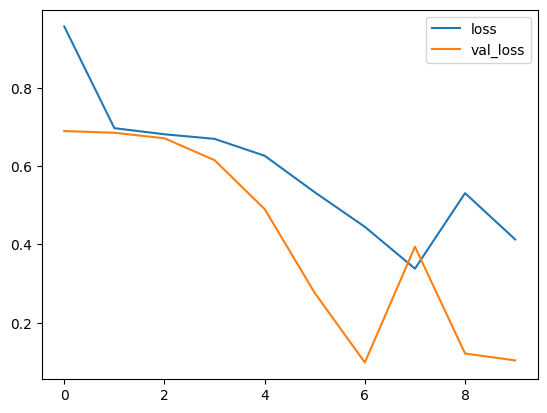

In [19]:
losses[['loss','val_loss']].plot()

<Axes: >

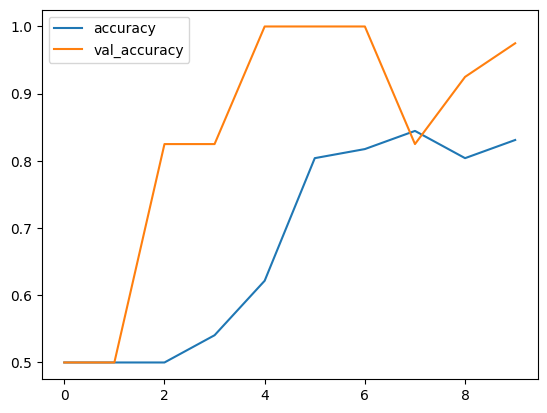

In [20]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

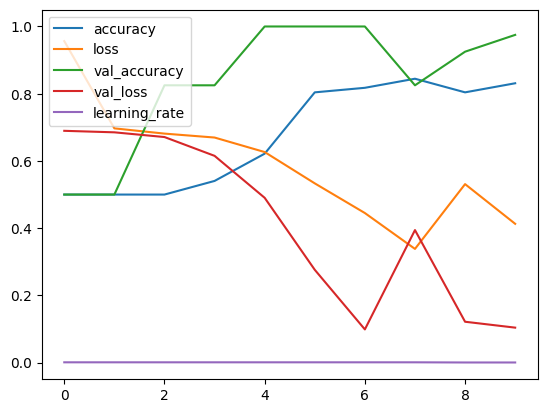

In [21]:
losses.plot()

In [22]:
model.evaluate(test_generator, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9729 - loss: 0.1056


[0.10412900149822235, 0.9750000238418579]

In [23]:
model_pred=model.predict(test_generator)
print(model_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step
[[0.01562186]
 [0.07504658]
 [0.97086954]
 [0.03239261]
 [0.00742427]
 [0.06710009]
 [0.8619895 ]
 [0.01120359]
 [0.8471655 ]
 [0.7954229 ]
 [0.8257393 ]
 [0.00187797]
 [0.9194798 ]
 [0.00399095]
 [0.00756593]
 [0.23871456]
 [0.83036673]
 [0.00862545]
 [0.00950447]
 [0.02974503]
 [0.78901297]
 [0.87646747]
 [0.9334252 ]
 [0.00415695]
 [0.8745524 ]
 [0.16180442]
 [0.87824917]
 [0.9130205 ]
 [0.8282379 ]
 [0.0198467 ]
 [0.4864744 ]
 [0.91484135]
 [0.8905806 ]
 [0.01404521]
 [0.01110956]
 [0.00624013]
 [0.13813448]
 [0.8757288 ]
 [0.951564  ]
 [0.8942709 ]]


In [24]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [25]:
class_names=['NORMAL','PNEUMONIA']

In [26]:
import matplotlib.pyplot as plt
import numpy as np
def plot_prediction(test_generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    images, labels = test_generator.next()
    predictions = np.argmax(model.predict(images), axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g')
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r')
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


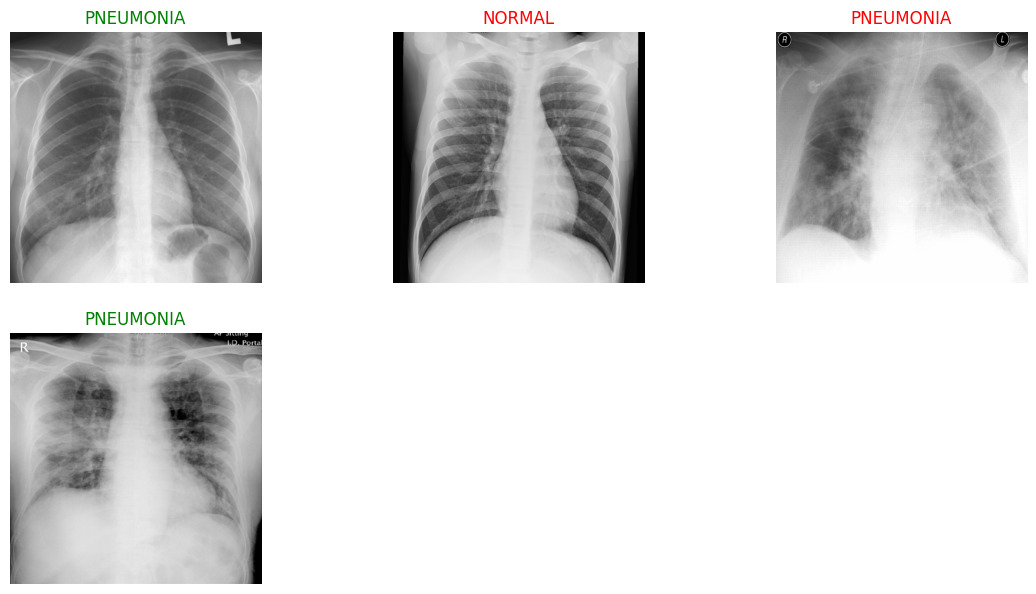

In [29]:
plot_prediction(test_generator,5)

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prediction(test_generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    # Use __next__() instead of .next() to get the next batch from the generator
    images, labels = test_generator.__next__()
    predictions = np.argmax(model.predict(images), axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g')
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r')
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model on the test set
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(test_generator.classes, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step
Confusion Matrix:
[[12  8]
 [ 9 11]]
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.57      0.60      0.59        20
   PNEUMONIA       0.58      0.55      0.56        20

    accuracy                           0.57        40
   macro avg       0.58      0.57      0.57        40
weighted avg       0.58      0.57      0.57        40

